# [E-03]CatWhiskersSticker ( 고양이 수염 스티커 )
_____
## 목차
### 1. 개요
    1.1 들어가기에 앞서
    1.2 루브릭 평가기준
### 2. 프로젝트: 고양이 수염 스티커 만들기
    2.1 사진 준비하기
    2.2 얼굴 검출하기
    2.3 얼굴 랜드마크하기
    2.4 스티커 적용하기
### 3. 다양한 변수에 따른 프로젝트
    3.1 얼굴의 각도가 정면이 아닐 때
    3.2 이미지 밝기가 어두울 때
    3.3 촬영거리가 먼 위치일 때
    3.4 마스크를 쓴 얼굴일 때
    3.5 이미지가 실제 사람의 얼굴이 아닐 때
### 4. 결론
    4.1 결론
    4.2 참조
    4.3 회고
    

-----


## 1. 개요
----
### 1.1 들어가기에 앞서
##### 학습 목표
- 얼굴인식 카메라의 흐름 이해
- dlib 라이브러리 사용
- 이미지 배열의 인덱싱 예외 처리       
      

##### 컴퓨터비전 라이브러리
- 컴퓨터 비전이란 컴퓨터를 활용하여, 정지 영상 또는 동영상으로부터 의미 있는 정보를 추출하는 방법을 연구하는 학문이다. 라이브러리의 종류는 Intel OpenCV Vision Library, Matrox Imaging Library, Euresys eVision Library, Cognex Vision Pro, Mvtec Halcon Hdevelop Library 등 여러가지가 있지만, 해당 라이브러리에서는 파이썬 언어에 적용 되는 opencv( Intel OpenCV Vision Library )를 사용한다.


##### 얼굴인식은 어떻게 할까?
- 사람의 얼굴 사진 혹은 영상에서 위치를 찾아내는 기술을 랜드마크(landmark) 혹은 조정(alignment)라고 한다. 얼굴 랜드마크 검출 전에는 보통 먼저 얼굴 검출이 선행되는데, 사람의 얼굴을 찾은 후에 코, 눈, 입, 눈썹, 턱선 랜드마크 검출이 진행된다.
  

##### 그렇다면 이미지에 사람 얼굴은 있는데 코, 눈, 입, 눈썹, 턱선 중에 하나 이상의 랜드마크가 없다면?
- 프로젝트를 진행하기 앞서 이러한 변수에 대해 랜드마크 검출은 어떻게 반응할까 궁금했다. 예시로 마스크를 썼을 때와 이미지가 실제 사람이 아닌 경우의 랜드마크를 검출해보도록 하고, 고양이 스티커 이미지를 추가할 수 있는 지에 대해 확인해보자.
----

## 1.2 루브릭 평가기준
평가문항|상세기준
-|-
1. 자기만의 카메라앱 기능 구현을 완수하였다.| 원본에 스티커 사진이 정상적으로 합성되었다.
2. 스티커 이미지를 정확한 원본 위치에 반영하였다. | 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다. | 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.


----

## 2. 프로젝트: 고양이 수염 스티커 만들기 
#### 이 프로젝트는 다음과 같은 과정을 거친다
###### 필요한 모듈 불러오기 >  OpenCV로 이미지를 불러오기, 색상 보정  >  불러온 이미지 얼굴 검출  > 랜드마크 출력   
###### > 코의 중심점 확인 > 불러올 스티커  이미지 좌표 조정 > 스티커 이미지 추가 >  바운딩 박스 및 랜드마크 제거
-----
### 2.1 사진 준비하기

In [1]:
# 필요한 모듈 import로 불러오기 
import os
import cv2 # opencv 모듈
import matplotlib.pyplot as plt
import numpy as np
import dlib

>이미지 처리를 위해 opencv 와 노트북에 이미지를 출력하기 위한 matplotlib를 읽어온다. 

>dlib는 얼굴인식에 관한 강한 성능을 갖고 있고,  dlib 의 기능을 사용하기 위한 이미지 처리에 대해서는 opencv 가 많은 역할을 하고 있다. 그렇기 때문에 dlib와 opencv 두 라이브러리 모두 같이 사용해주면 좋다.

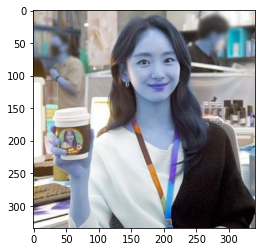

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(img_bgr)
plt.show()

>이미지 사진의 색상이 푸른빛이 감도는 이유는 opencv의 특징 때문이다.

>matplotlib, dlib 등의 이미지 라이브러리 이미지 채널은 RGB(빨강, 녹색, 파랑) 순, opencv는 BGR(파랑, 녹색, 빨강)을 사용한다.

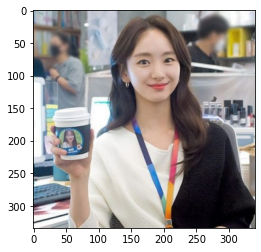

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # BGR -> RGB로 보정
plt.imshow(img_rgb)
plt.show()

>dlib은 RGB 이미지를 입력으로 받기 때문에 opencv의 BGR 이미지에서 RGB 이미지로 변환시킨다.

-----
### 2.2 얼굴 검출하기

In [4]:
# detector를 선언

detector_hog = dlib.get_frontal_face_detector()  

>dlib의 face detector는 HOG와 SVM 사용하여 얼굴을 찾는다.

>HOG: 이미지에서 색상의 변화량을 나타낸 것. 사람이 들어간 이미지를 시각화하면, 사람의 특징을 잡아 형체를 나타냄

>SVM: 다차원 공간의 여러 벡터를 여러 이미지라 할 때, 여러 벡터를 잘 구분짓는 선형분류 방법이다.

>HOG 알고리즘으로 추출한 특징 벡터를 이용하여 SVM을 학습한다면 정확도는 뛰어난다고 한다.

In [5]:
# detector_hog를 이용해서 얼굴의 bounding box를 추출
# 찾은 얼굴 영역 박스 좌표

dlib_rects = detector_hog(img_rgb, 1)   
print(dlib_rects)

rectangles[[(145, 56) (235, 146)]]


>detector_hog의 두 번째 파라미터는 이미지 피라미드의 수

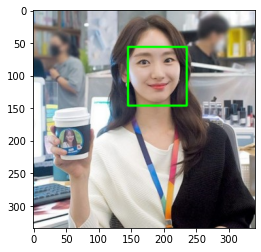

In [6]:
# 찾은 얼굴 영역 박스 리스트
# dlib detector 는 dlib.rectangles 타입의 객체를 반환한다. dlib.rectangles 는 dlib.rectangle 객체의 배열 형태  

for dlib_rect in dlib_rects: #dlib.rectangle객체는 left(), top(), right(), bottom(), height(), width() 등의 멤버 함수를 포함
    l = dlib_rect.left()        
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

> 얼굴을 검출한 박스 좌표: [left: 145, top: 56, right: 235, bottom: 146]

-----
### 2.3 얼굴 랜드마크하기

In [7]:
# 랜드마크 불러오기

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

>landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환

In [8]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    # face landmark 좌표를 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) 
    list_landmarks.append(list_points) 

print(len(list_landmarks[0]))

68


>points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근가능

>list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장

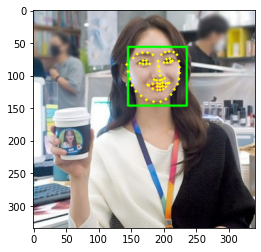

In [9]:
# 랜드마크 영상을 출력

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

-----
### 2.4 스티커 적용하기

In [10]:
# 코의 중심점 확인

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(194, 100)
(x,y) : (194,55)
(w,h) : (91,91)


In [11]:
# 스티커 이미지를 불러오기

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(91, 91, 3)


In [12]:
# 원본 이미지에 스티커 이미지를 추가하기 위해 코의 좌표에 맞게끔 x, y 좌표를 조정

refined_x = x - w // 2
refined_y = y 
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))  

(x,y) : (149,55)


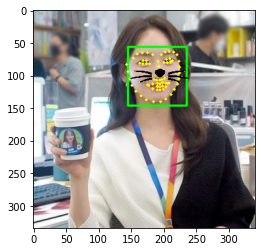

In [13]:
# 스티커가 적용된 이미지 출력하기

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

> img_show[from:to] 형식

> rgb의 최댓값 255는 흰색을 표현. 스티커 이미지에서 사용할 부분은 255이 아닌 색이 있는 부분을 사용할 것 np.where문 활용

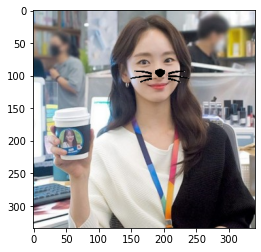

In [14]:
# bounding box와 landmark를 제거한 이미지 출력하기

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

> 초기에 저장해놓은 img_bgr 이미지를 활용하여 스티커를 붙인다
----

## 3. 다양한 변수에 따른 프로젝트
#### 루브릭 평가 기준에 맞추어 얼굴각도, 이미지 밝기, 촬영거리 등 변수에 적용된 프로젝트 및 추가적으로 마스크를 쓴 얼굴 경우, 사람의 얼굴이 아닌 경우에 대해 프로젝트 작성
----
### 3.1 얼굴의 각도가 정면이 아닐 때

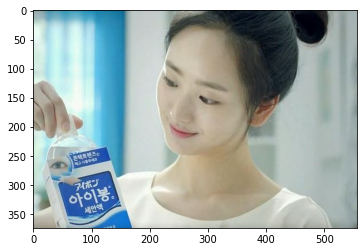

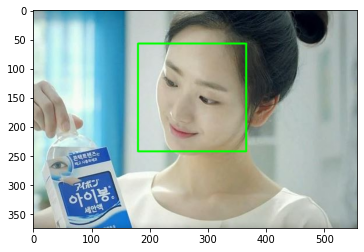

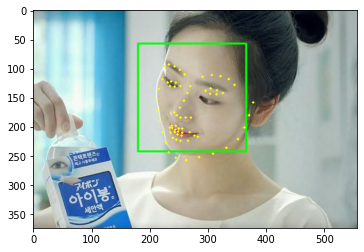

In [15]:
import os
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import dlib

# 원본이미지 출력
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image2.png'
img_bgr = cv2.imread(my_image_path)   
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
plt.imshow(img_rgb)
plt.show()

# bounding box를 추출 
detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1)   


for dlib_rect in dlib_rects:
    l = dlib_rect.left()        
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# face landmark를 출력
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) 
    list_landmarks.append(list_points) 
    
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

> 첫 프로젝트 내용과 동일하게 bounding box를 추출 하고 face landmark를 출력

(252, 167)
(187, 187, 3)


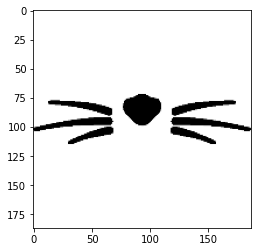

In [16]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB))
plt.show()

> 불러올 스티커 이미지 출력한다. 그러나 기존 이미지의 얼굴 각도가 정면에서 돌아가 있으므로, 사진도 회전시켜 출력해야 한다.

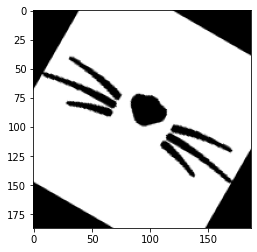

In [17]:
img_h, img_w = img_sticker.shape[:2]

rotate = cv2.getRotationMatrix2D((img_w/2, img_h/2), 330, 1)

img_rotate = cv2.warpAffine(img_sticker, rotate, (img_w, img_h))

plt.imshow(cv2.cvtColor(img_rotate, cv2.COLOR_BGR2RGB))
plt.show()

> OpenCV에서 제공하는 cv.2getRotationMatrix2D 함수를 사용하여 중앙을 기준으로 기입한 각도만큼 회전

> 원하는 각도에 맞추어 스티커 이미지를 회전 시켰으나, 위 이미지대로 붙인다면 원본 이미지에 벗어난 검은 테두리도 같이 출력될 가능성이 높을 것 같다.

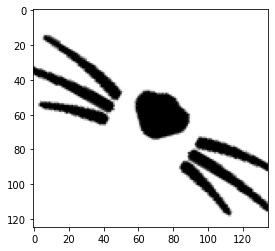

In [18]:
img_rotate_copy =img_rotate.copy()
img_rotate_cut = img_rotate[25:150,25:160]
img_rotate_copy[25:150,25:160] = img_rotate_cut

plt.imshow(cv2.cvtColor(img_rotate_cut, cv2.COLOR_BGR2RGB))
plt.show()

> 검은테두리를 없애기 위해 원하는 범위를 제외하고 스티커이미지를 잘라냈다.

(x,y) : (179,117)


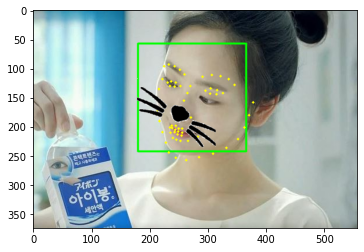

In [19]:
refined_x = x - w // 2 + 20
refined_y = y + h // 2 - 50
print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) 

sticker_area = img_show[refined_y:refined_y+img_rotate_cut.shape[0], refined_x:refined_x+img_rotate_cut.shape[1]]
img_show[refined_y:refined_y+img_rotate_cut.shape[0], refined_x:refined_x+img_rotate_cut.shape[1]] = \
    np.where(img_rotate_cut==255,sticker_area,img_rotate_cut).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

> 좌표값 계산을 좀 복잡하게 했지만, 원하는 위치에 성공적으로 스티커 이미지를 붙일 수 있었다.

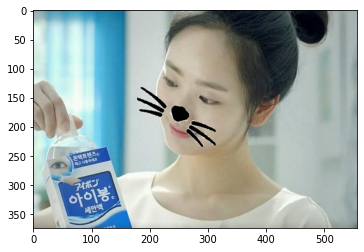

In [20]:
sticker_area = img_bgr[refined_y:refined_y +img_rotate_cut.shape[0], refined_x:refined_x+img_rotate_cut.shape[1]]
img_bgr[refined_y:refined_y +img_rotate_cut.shape[0], refined_x:refined_x+img_rotate_cut.shape[1]] = \
    np.where(img_rotate_cut==255,sticker_area,img_rotate_cut).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

> 마지막으로 bounding box 및 face landmark를 제거한다.
# 
-----

### 3.2 이미지 밝기가 어두울 때

![image0](./image0.png)
## 위 사진은 아래 프로젝트를 진행할 원본 사진.  얼굴 한 부위가 애매하게 보이지 않는다면 어떨까 하여 직접 밝기를 낮춘 상태로 이미지를 사용했다.                                    

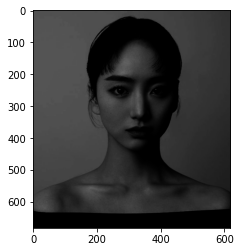

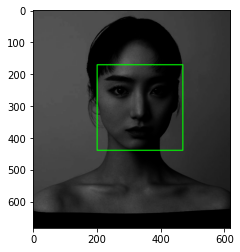

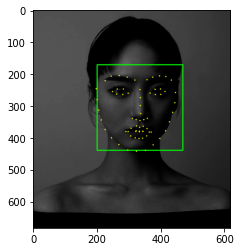

In [21]:
# 필요한 모듈 import로 불러오기 
import os
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import dlib

# 원본이미지 출력
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image3.png'
img_bgr = cv2.imread(my_image_path)   
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
plt.imshow(img_rgb)
plt.show()

# bounding box를 추출 
detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1)   


for dlib_rect in dlib_rects:
    l = dlib_rect.left()        
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# face landmark를 출력
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) 
    list_landmarks.append(list_points) 
    
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

> 오른쪽 눈이 보이지 않을 정도로 어두운 이미지인데, 정확하게 bounding box 및 landmark가 출력되었다.

(336, 324)
(x,y) : (336,190)
(w,h) : (269,269)
(x,y) : (202,190)


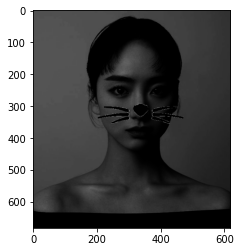

In [22]:
# 코의 중심점 확인

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

# 스티커 이미지를 불러오기

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y 
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))  

# 스티커 이미지 출력하기

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

> 정확하게 스티커 이미지가 적용된 것 같다. 이 결과를 통해 화면이 어둡더라도 앞선 절차 bounding box 및 landmark가 정확하게 출력이 된다고 한다면, 스티커 적용하는 것에도 변수나 문제가 적용되진 않을 것 같다.  
----

### 3.3 촬영거리가 먼 위치일 때

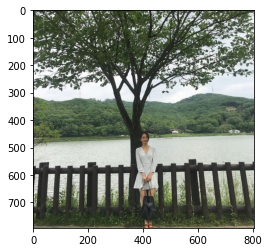

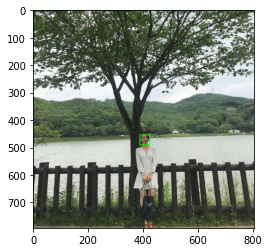

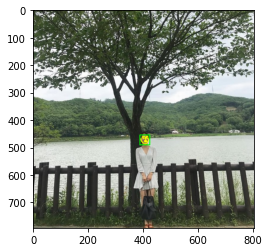

In [23]:
# 필요한 모듈 import로 불러오기 
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

# 원본이미지 출력
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image4.png'
img_bgr = cv2.imread(my_image_path)   
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
plt.imshow(img_rgb)
plt.show()

# bounding box를 추출 
detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1)   


for dlib_rect in dlib_rects:
    l = dlib_rect.left()        
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# face landmark를 출력
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) 
    list_landmarks.append(list_points) 
    
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

> 코드를 실행하고 나서 정말 놀라웠다. 이미지의 저 작은 한 부분에서 bounding box와 landmark 출력될 지는 몰랐기 때문이다. 하지만 랜드마크의 개수가 정확히 출력된 지는 아직까지 모르겠다.

(410, 472)
(x,y) : (410,454)
(w,h) : (37,37)
(x,y) : (392,454)


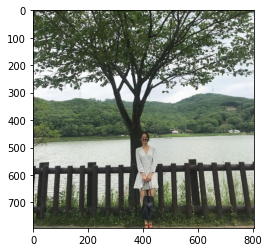

In [24]:
# 코의 중심점 확인

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

# 스티커 이미지를 불러오기

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y 
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))  

# 스티커 이미지 출력하기

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

> 자세히는 보이지 않지만, 이미지의 얼굴에 스티커 이미지가 들어간 것 같기는 하다. 코의 랜드마크가 정확히 인식 되었다면 성공적으로 스티커 이미지가 적용되었을 것이다. 

----

### 3.4 마스크를 쓴 얼굴일 때

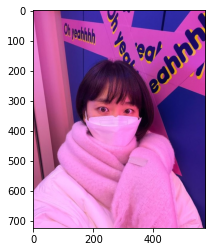

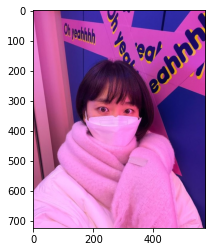

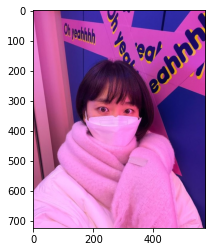

In [25]:
# 필요한 모듈 import로 불러오기 
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

# 원본이미지 출력
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image5.png'
img_bgr = cv2.imread(my_image_path)   
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
plt.imshow(img_rgb)
plt.show()

# bounding box를 추출 
detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1)   


for dlib_rect in dlib_rects:
    l = dlib_rect.left()        
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# face landmark를 출력
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) 
    list_landmarks.append(list_points) 
    
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

> 확실하게 사람의 얼굴이 포함된 이미지임에도 불구하고, 마스크 때문에 코와 입이 보이지 않아 bounding box 및 landmark가 출력되지 않았다.

> 그렇다면 실제 사람의 얼굴이 아닐 때라면 어떨 지 다음 장에서 확인해보겠다.

-----

### 3.5 이미지가 실제 사람의 얼굴이 아닐 때
#### 1).  이목구비가 뚜렷한 캐릭터

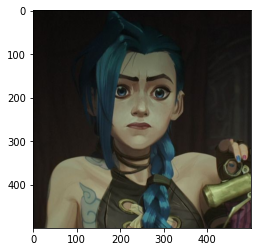

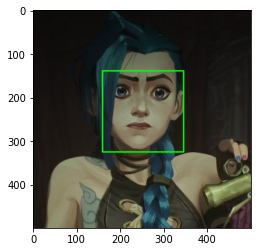

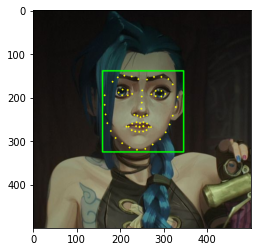

In [26]:
# 필요한 모듈 import로 불러오기 
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

# 원본이미지 출력
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image9.jpg'
img_bgr = cv2.imread(my_image_path)   
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
plt.imshow(img_rgb)
plt.show()

# bounding box를 추출 
detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1)   


for dlib_rect in dlib_rects:
    l = dlib_rect.left()        
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# face landmark를 출력
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) 
    list_landmarks.append(list_points) 
    
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

> 정확한 눈코입을 가진 캐릭터의 이미지에서는 bounding box 및 landmark가 출력되었다.

(248, 226)
(x,y) : (248,133)
(w,h) : (187,187)
(x,y) : (155,133)


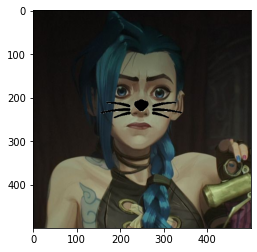

In [27]:
# 코의 중심점 확인

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

# 스티커 이미지를 불러오기

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y 
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))  

# 스티커 이미지 출력하기

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

> 애니의 캐릭터라도 사람의 형상인 코, 눈, 입, 눈썹, 턱선이 정확하게 있다면 스티커이미지 또한 적용 가능한 것 같다.

-----

#### 2). 이목구비가 뚜렷하지 않은 캐릭터

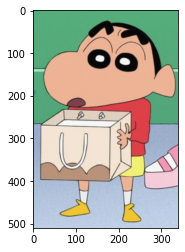

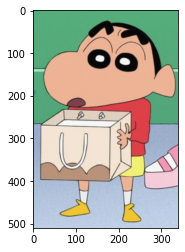

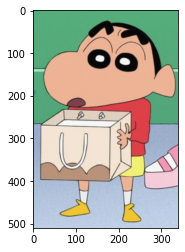

In [28]:
# 필요한 모듈 import로 불러오기 
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

# 원본이미지 출력
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image7.jpg'
img_bgr = cv2.imread(my_image_path)   
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
plt.imshow(img_rgb)
plt.show()

# bounding box를 추출 
detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1)   


for dlib_rect in dlib_rects:
    l = dlib_rect.left()        
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# face landmark를 출력
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) 
    list_landmarks.append(list_points) 
    
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

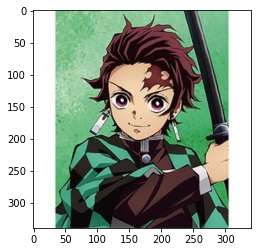

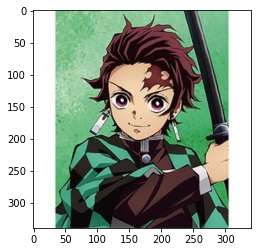

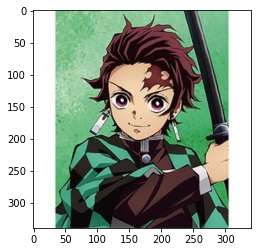

In [29]:
# 필요한 모듈 import로 불러오기 
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

# 원본이미지 출력
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image6.jpg'
img_bgr = cv2.imread(my_image_path)   
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
plt.imshow(img_rgb)
plt.show()

# bounding box를 추출 
detector_hog = dlib.get_frontal_face_detector()  
dlib_rects = detector_hog(img_rgb, 1)   


for dlib_rect in dlib_rects:
    l = dlib_rect.left()        
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# face landmark를 출력
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) 
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) 
    list_landmarks.append(list_points) 
    
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

> 두 가지 예시 모두 bounding box 및 landmark가 출력되지 않았다. 이미지가 애니 캐릭터라서라기 보다는 이목구비의 문제인 것 같다. 이제는 결론으로 넘어가 어느 정도 결론을 내릴 수 있을 것 같다.
# 
-----
# 

## 4. 결론
### 4.1 결론
얼굴의 각도가 정면이 아닐 때
- bounding box 및 landmark 출력 O
- 얼굴의 각도가 달라지면 스티커 이미지의 각도 회전도 필요하다. 불필요하게 나타난 부분은 지워주었으나, 고양이 수염의 일부분도 같이 잘려나갔다.

이미지 밝기가 어두울 때
- bounding box 및 landmark 출력 O
- 이미지가 어둡더라도 사람 얼굴의 형태가 조금이라도 있다면 출력에는 문제가 없는 것 같다.
- 다만 스티커의 밝기가 완전히 캄캄하거나 하얗다면 이목구비 인식에 문제가 있을 수 있을 것 같다.

촬영거리가 먼 위치일 때
- bounding box 및 landmark 출력 O
- 위 결과를 출력하는 것에 문제는 없었으나, 랜드마크의 개수와 스티커이미지가 원하는 곳에 추가되었는 지 정확함에 있어서는 불확실하다.

마스크를 쓴 얼굴일 때
- bounding box 및 landmark 출력 X
- 마스크를 쓰면 코와 입 부분이 가려지기 때문에 랜드마크 출력이 불가능하다.

이미지가 실제 사람의 얼굴이 아닐 때
- 1). bounding box 및 landmark 출력 O
- 2). bounding box 및 landmark 출력 X
- 실제 사람과 마찬가지로 눈, 코, 입, 눈썹, 턱선이 정확하다면 출력에 문제없다.
----

![image10](./image10.png)



### 정리
 일단 bounding box 및 landmark가 정상적으로 출력된다면 고양이 수염 스티커 이미지를 추가하는 것에 문제가 없는 것을 확인했다. 이미지의 밝기는 상관없음을 확인했고, 촬영거리가 멀더라도 사람이라면 인식하는 것에 문제가 없었다. 중간 과정에는 생략되었으나 고개가 완전히 돌아간 사진이 있었는데 눈, 코, 입, 눈썹, 턱선이 뚜렷하지 않은 사진에는 bounding box 및 landmark 생성에 어려움이 있음을 확인했었다. 반면 위 결과와 마찬가지로 정면이어도 마스크를 쓴 것처럼 얼굴 일부가 가려진다면 랜드마크 생성은 당연히 불가하다. 마지막으로 만화 캐릭터의 이미지를 사용함으로써 내린 결론은 **실제 사람이든 아니든 위의 사진처럼 이목구비가 뚜렷하다면 bounding box 및 68개의 landmark도 잘 생성된다는 것이다.**
  

---

## 4.2 참조
#### 이론
- 컴퓨터비전, OpenCV: https://media.fastcampus.co.kr/knowledge/dev/computervision-opencv/
- 랜드마크: https://bskyvision.com/869
- 마스크 얼굴 데이터 자동 합성 시스템: https://www.koreascience.or.kr/article/CFKO202023758833979.pdf


#### 코드
- 이미지 회전: https://fisher10001.tistory.com/102?category=868570
- 이미지 자르기: https://davey.tistory.com/entry/Python-opencv-%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%9B%90%ED%95%98%EB%8A%94-%EB%B6%80%EB%B6%84%EB%A7%8C-%EC%9E%90%EB%A5%B4%EA%B8%B0-%EB%B0%A9%EB%B2%95
 

#### 이미지
- 사진(원진아 님): https://www.instagram.com/j0i3n2a9/
- 기타


----

## 4.3 회고
#### 좌표 설정에 대한 미흡
- 루브릭 평가 기준에서는 정확한 좌표 계산을 요구한다고 써 있지만, 스스로 과제를 해결하여 익히자는 마음이 컸다. 그렇기에 이미지 회전과 이미지 자르기 부분을 제외하고는 코드에 대한 참조를 하지 않았다. 정확한 좌표값을 설정했는 지에 대해는 애매하다는 느낌은 있었다. refined_x와 y의 값을 변경하여 고양이 수염의 위치가 원본 얼굴에 잘 어울렸기에 심각하게 생각하지는 않았으나, 이게 맞나 싶은 생각이 들었기에 미숙한 부분을 받아들이고 프로젝트 제출 완료 후에 코드 참조를 하는 것이 맞다는 생각이다.

#### 먼 거리에서 촬영한 이미지에서 랜드마크에 대한 의문점
- Dlib의 ibug 300w 데이터셋은 랜드마크 68개를 사용한다고 배웠다. 프로젝트 과정 중 먼 거리에서 촬영한 이미지의 경우 얼굴의 크기가 작기 때문에 68개가 있는 지 확인이 불가능했었다. 이 궁금증을 해결하기 위해 찾아보았으나 찾지 못했다. 다른 상황들의 프로젝트를 하다 보니 이목구비가 뚜렷하지 않을 때는 랜드마크가 아예 출력되지 않는 결과를 확인했다. 그래서 일단 '랜드마크가 표출될 때는 68개의 개수 모두 표출되는 것', '그렇지 않다면 랜드마크는 아예 생성되지 않는 것'이라 결론을 내리고 보고서를 작성했다.

#### 마스크를 썼을 때 얼굴인식에 대한 의문점
- 본 내용에서 '마스크를 쓴 얼굴일 때' 예시의 경우에는 얼굴인식이 불가능했다. 그러나 실제로 마스크를 쓴 상태로 얼굴인식을 통해 체온을 측정할 때에는 bounding box가 생성되는 것을 확인할 수 있었고, 얼굴인식 또한 가능한 것을 확인할 수 있다. 이 부분에 대해서는 참조를 통해 의문점을 해결하긴 했으나 중요한 부분이기 때문에 다루고 싶었다. 핵심적인 내용을 요약하자면 해당 얼굴인식이 가능하려면 마스크 얼굴에 대한 데이터셋이 필요하다는 것이고, 그 데이터셋을 통해 합성시스템이 이루어지면 랜드마크에 대한 조정도 필요하다는 것이다.

#### 스티커 회전
- 얼굴의 각도에 따라 적용할 스티커도 회전을 시켜주어야 했는데, 이 부분에서 상당한 시간이 걸렸던 것 같다. 그냥 차라리 일러스트 레이트를 이용해서 회전시킨 사진을 업로드하여 사용하면 안 되나 싶은 생각이 들었을 정도로 어려움이 있었다. 최대한 참조를 줄이고, 코드의 길이도 간편하게 하자는 생각으로 작성했다. 다만 스티커의 일부분이 잘려나간 것으로 보아 OpenCv에서 회전 변환에 대한 코드를 작성하는 방법이 옳은 방법 같다. 평가 기준에서 이런 부분이 없기에 넘어갔다지만, 나중 프로젝트는 여러 사항 혹은 방법들에 대해 검토를 할 필요를 느낀다.